In [1]:
# import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [5]:
# load diamonds dataset
diamonds = pd.read_csv('./data/diamonds.csv', index_col=0)

In [6]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Convert categorical variables to numeric
- For regression, we need to convert categorical variables to numeric variables but maintain the importance of the categories.
- For example, in 'cut' column Premium is more important than Ideal, Good, Very Good and Fair. So we need to convert the categories to numbers in such a way that the importance of the categories is maintained.
- For classification, the importance of the categories is not important. So we can convert the categories to numbers in any way. Can use here -> diamonds['cut'].astype('category').cat.codes
- For regression, we can use here -> pd.get_dummies(diamonds['cut'], prefix='cut') or create a dictionary and map the values to the categories.

As per description in Kaggle website for the dataset, found the order of importance of the categories in all the columns and using it as it is in the below dictionaries.

In [11]:
print("Unique values in Cut Columns: ", diamonds['cut'].unique())
print("Unique values in Color Columns: ", diamonds['color'].unique())
print("Unique values in Clarity Columns: ", diamonds['clarity'].unique())

Unique values in Cut Columns:  ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
Unique values in Color Columns:  ['E' 'I' 'J' 'H' 'F' 'G' 'D']
Unique values in Clarity Columns:  ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [12]:
# create dictionaries for categorical variables
cut_dict = {'Fair':1, 'Good':2, 'Very Good':3, 'Premium':4, 'Ideal':5}
color_dict = {'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7}
clarity_dict = {'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}

In [13]:
# map the dictionaries to the categorical variables
diamonds['cut'] = diamonds['cut'].map(cut_dict)
diamonds['color'] = diamonds['color'].map(color_dict)
diamonds['clarity'] = diamonds['clarity'].map(clarity_dict)

In [14]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
3,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
4,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
5,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75


### Check for missing values

In [15]:
diamonds.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

No missing values in the dataset.

### Check for outliers
- Outliers can be detected using boxplots.
- Outliers are the data points that are far away from the other data points.
- Outliers can be removed if the dataset is huge and if the outliers are very few.

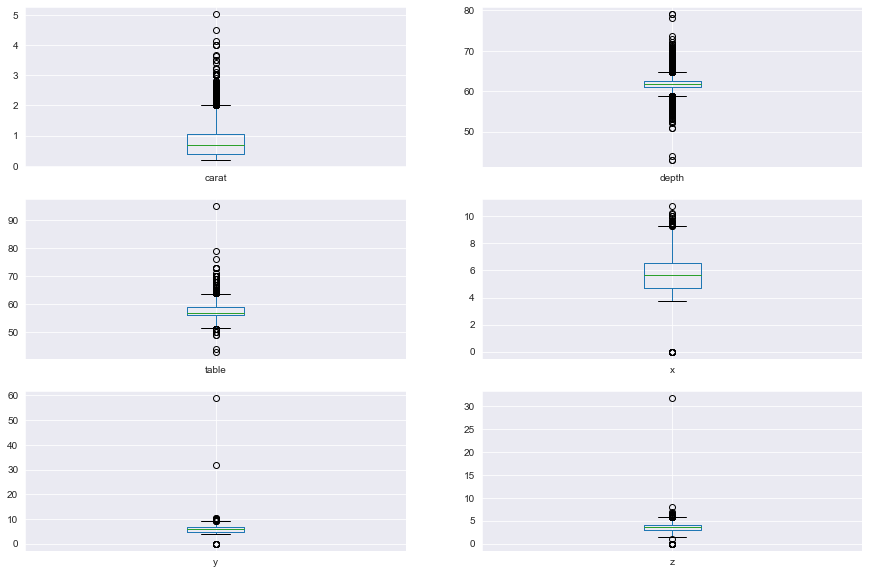

In [18]:
# plot boxplots for all the numeric columns
fig, ax = plt.subplots(3,2, figsize=(15,10))
diamonds[['carat']].boxplot(ax=ax[0,0])
diamonds[['depth']].boxplot(ax=ax[0,1])
diamonds[['table']].boxplot(ax=ax[1,0])
diamonds[['x']].boxplot(ax=ax[1,1])
diamonds[['y']].boxplot(ax=ax[2,0])
diamonds[['z']].boxplot(ax=ax[2,1])
# sns.boxplot(data=diamonds[['carat', 'depth', 'table', 'x', 'y', 'z']])
plt.show()

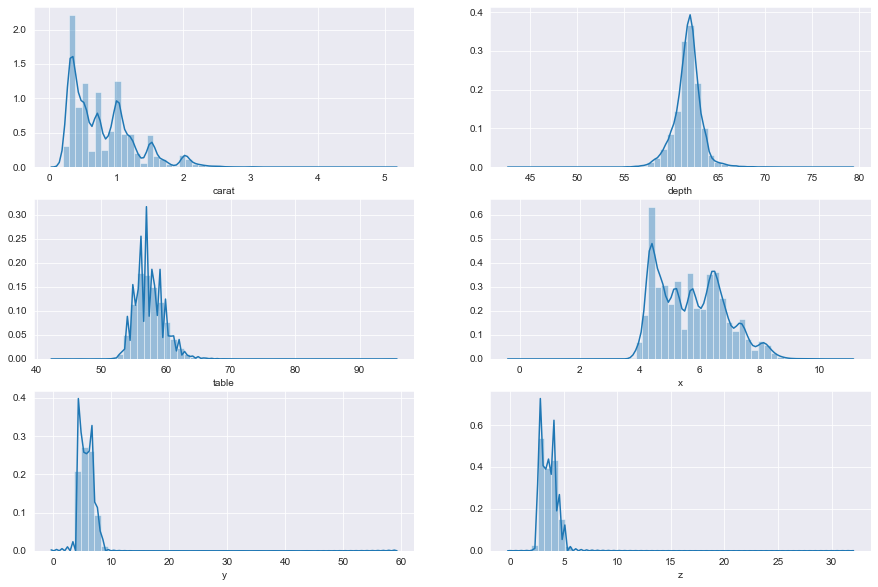

In [19]:
# plotting histograms for all the numeric columns
fig, ax = plt.subplots(3,2, figsize=(15,10))
sns.distplot(diamonds['carat'], ax=ax[0, 0])
sns.distplot(diamonds['depth'], ax=ax[0, 1])
sns.distplot(diamonds['table'], ax=ax[1, 0])
sns.distplot(diamonds['x'], ax=ax[1, 1])
sns.distplot(diamonds['y'], ax=ax[2, 0])
sns.distplot(diamonds['z'], ax=ax[2, 1])
plt.show()

In [20]:
# remove outliers
df_without_outliers = diamonds[(diamonds['carat']<3) & (diamonds['depth']>50) & (diamonds['depth']<75)
                               & (diamonds['table']>45) & (diamonds['table']<75) & (diamonds['x']<10)
                               & (diamonds['y']<10) & (diamonds['z']<6)]


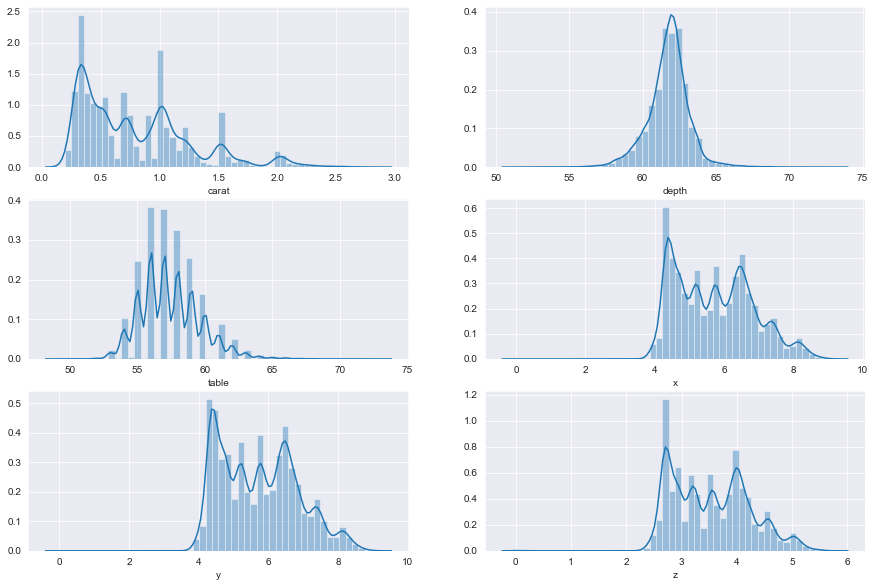

In [22]:
# plotting histograms for all the numeric columns
fig, ax = plt.subplots(3,2, figsize=(15,10))
sns.distplot(df_without_outliers['carat'], ax=ax[0, 0])
sns.distplot(df_without_outliers['depth'], ax=ax[0, 1])
sns.distplot(df_without_outliers['table'], ax=ax[1, 0])
sns.distplot(df_without_outliers['x'], ax=ax[1, 1])
sns.distplot(df_without_outliers['y'], ax=ax[2, 0])
sns.distplot(df_without_outliers['z'], ax=ax[2, 1])
plt.show()

In [23]:
# doing square root transformation to reduce the skewness and for outliers
df_no_outliers_sqrt = diamonds.copy()
df_no_outliers_sqrt['carat'] = np.sqrt(df_no_outliers_sqrt['carat'])
df_no_outliers_sqrt['depth'] = np.sqrt(df_no_outliers_sqrt['depth'])
df_no_outliers_sqrt['table'] = np.sqrt(df_no_outliers_sqrt['table'])
df_no_outliers_sqrt['x'] = np.sqrt(df_no_outliers_sqrt['x'])
df_no_outliers_sqrt['y'] = np.sqrt(df_no_outliers_sqrt['y'])
df_no_outliers_sqrt['z'] = np.sqrt(df_no_outliers_sqrt['z'])

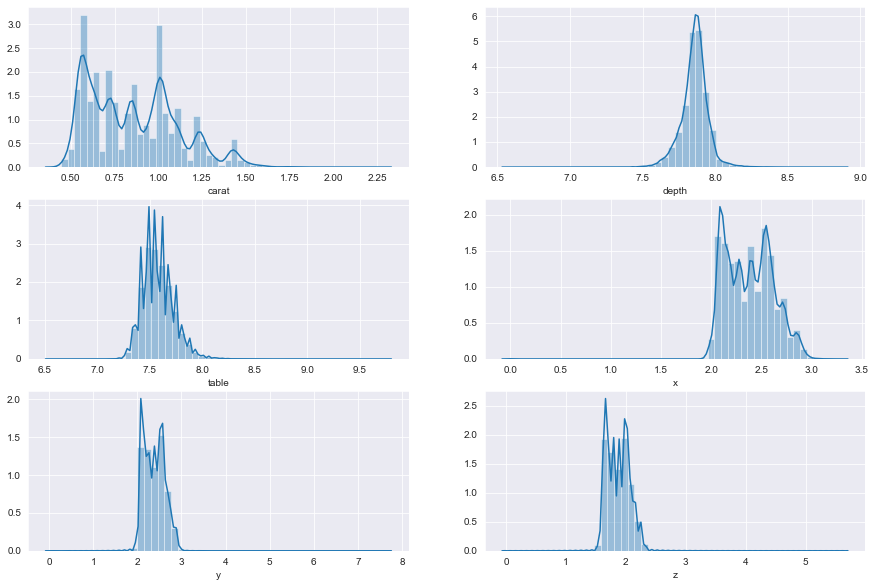

In [24]:
# plotting histograms for all the numeric columns
fig, ax = plt.subplots(3,2, figsize=(15,10))
sns.distplot(df_no_outliers_sqrt['carat'], ax=ax[0, 0])
sns.distplot(df_no_outliers_sqrt['depth'], ax=ax[0, 1])
sns.distplot(df_no_outliers_sqrt['table'], ax=ax[1, 0])
sns.distplot(df_no_outliers_sqrt['x'], ax=ax[1, 1])
sns.distplot(df_no_outliers_sqrt['y'], ax=ax[2, 0])
sns.distplot(df_no_outliers_sqrt['z'], ax=ax[2, 1])
plt.show()

DONE with handling the outliers.

### Check for multicollinearity
- Multicollinearity is the situation in which two or more explanatory variables in a multiple regression model are highly linearly related.
- Multicollinearity can be detected using correlation matrix.
- Multicollinearity can be removed by removing one of the correlated variables.
- Multicollinearity can be removed by using PCA.

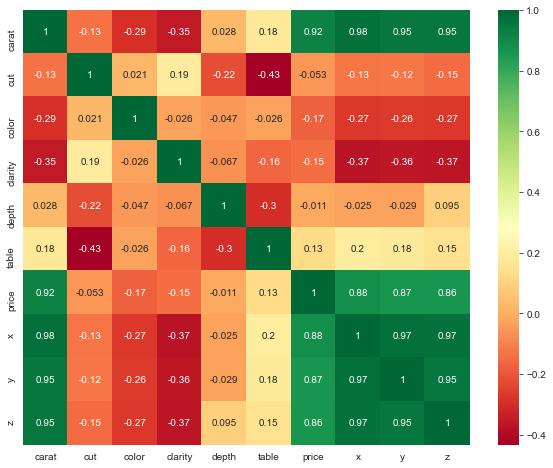

In [29]:
# plot correlation matrix for original diamonds dataset
plt.figure(figsize=(10,8))
sns.heatmap(diamonds.corr(), annot=True, cmap='RdYlGn')
plt.show()

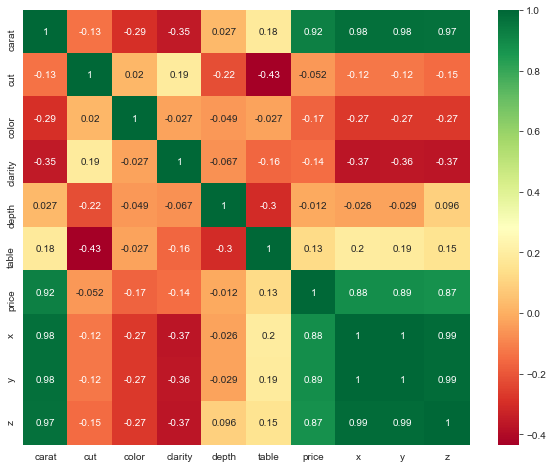

In [30]:
# plot correlation matrix for diamonds dataset without outliers
plt.figure(figsize=(10,8))
sns.heatmap(df_without_outliers.corr(), annot=True, cmap='RdYlGn')
plt.show()

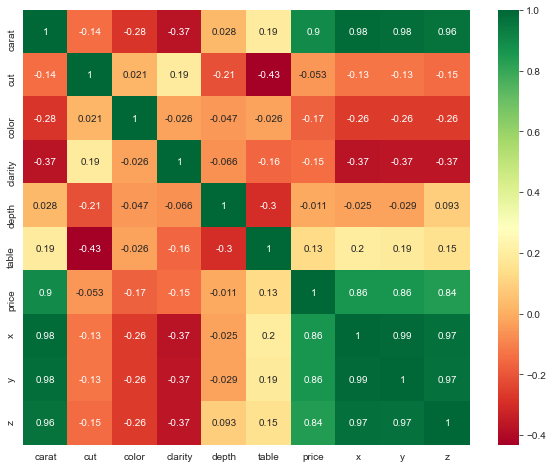

In [31]:
# plot correlation matrix for diamonds dataset without outliers and with square root transformation
plt.figure(figsize=(10,8))
sns.heatmap(df_no_outliers_sqrt.corr(), annot=True, cmap='RdYlGn')
plt.show()

### Scaling the data

In [35]:
import sklearn
from sklearn.utils import shuffle
from sklearn import preprocessing, svm, linear_model
from sklearn.model_selection import train_test_split

In [34]:
# shuffle the dataset
diamonds = shuffle(diamonds)
df_without_outliers = shuffle(df_without_outliers)
df_no_outliers_sqrt = shuffle(df_no_outliers_sqrt)

In [36]:
# split the dataset into train and test
X_train_diamonds, X_test_diamonds, y_train_diamonds, y_test_diamonds = train_test_split(diamonds.drop('price', axis=1),
                                                                                        diamonds['price'], test_size=0.2,
                                                                                        random_state=42)
X_train_wo, X_test_wo, y_train_wo, y_test_wo = train_test_split(df_without_outliers.drop('price', axis=1),
                                                                df_without_outliers['price'], test_size=0.2,
                                                                random_state=42)
X_train_sqrt, X_test_sqrt, y_train_sqrt, y_test_sqrt = train_test_split(df_no_outliers_sqrt.drop('price', axis=1),
                                                                        df_no_outliers_sqrt['price'], test_size=0.2,
                                                                        random_state=42)

In [37]:
# scale the data
X_train_diamonds_scaled = preprocessing.scale(X_train_diamonds)
X_test_diamonds_scaled = preprocessing.scale(X_test_diamonds)
X_train_wo_scaled = preprocessing.scale(X_train_wo)
X_test_wo_scaled = preprocessing.scale(X_test_wo)
X_train_sqrt_scaled = preprocessing.scale(X_train_sqrt)
X_test_sqrt_scaled = preprocessing.scale(X_test_sqrt)

### Predictive Algorithms:
---
#### 1. Linear Regression

In [38]:
# Linear Regression on diamonds dataset
linear_clf = linear_model.LinearRegression()
linear_clf.fit(X_train_diamonds_scaled, y_train_diamonds)

# score on test data gives the R^2 value
print('Score for diamonds dataset: ', linear_clf.score(X_test_diamonds_scaled, y_test_diamonds))

Score for diamonds dataset:  0.9105633687206329


In [39]:
# predict on test data
for i in range(15):
    print('Predicted value: ', linear_clf.predict([X_test_diamonds_scaled[i]]))
    print('Actual value: ', y_test_diamonds.iloc[i])
    print('---------------------------------------')

Predicted value:  [3827.25729455]
Actual value:  3084
---------------------------------------
Predicted value:  [726.78869214]
Actual value:  811
---------------------------------------
Predicted value:  [2359.52951209]
Actual value:  1743
---------------------------------------
Predicted value:  [6306.97616089]
Actual value:  5722
---------------------------------------
Predicted value:  [4396.74003563]
Actual value:  4705
---------------------------------------
Predicted value:  [5447.96750311]
Actual value:  3366
---------------------------------------
Predicted value:  [101.59458679]
Actual value:  449
---------------------------------------
Predicted value:  [6860.34557195]
Actual value:  6078
---------------------------------------
Predicted value:  [4006.09079387]
Actual value:  2575
---------------------------------------
Predicted value:  [1157.68047959]
Actual value:  1427
---------------------------------------
Predicted value:  [5040.97779028]
Actual value:  4578
----------

In [40]:
# Linear Regression on diamonds dataset without outliers
linear_clf_wo = linear_model.LinearRegression()
linear_clf_wo.fit(X_train_wo_scaled, y_train_wo)

# score on test data gives the R^2 value
print('Score for diamonds dataset without outliers: ', linear_clf_wo.score(X_test_wo_scaled, y_test_wo))

Score for diamonds dataset without outliers:  0.9144236020107123


In [41]:
# predict on test data
for i in range(15):
    print('Predicted value: ', linear_clf_wo.predict([X_test_wo_scaled[i]]))
    print('Actual value: ', y_test_wo.iloc[i])
    print('---------------------------------------')

Predicted value:  [6751.78247723]
Actual value:  6093
---------------------------------------
Predicted value:  [4299.32894068]
Actual value:  3864
---------------------------------------
Predicted value:  [13627.0165797]
Actual value:  10772
---------------------------------------
Predicted value:  [6769.95988552]
Actual value:  8905
---------------------------------------
Predicted value:  [1916.96351443]
Actual value:  1052
---------------------------------------
Predicted value:  [7621.43064529]
Actual value:  7219
---------------------------------------
Predicted value:  [1192.65469023]
Actual value:  961
---------------------------------------
Predicted value:  [2740.07615108]
Actual value:  1444
---------------------------------------
Predicted value:  [3916.7299295]
Actual value:  4337
---------------------------------------
Predicted value:  [14351.32187241]
Actual value:  14763
---------------------------------------
Predicted value:  [12315.88634067]
Actual value:  9344
----

In [42]:
# Linear Regression on diamonds dataset without outliers and with square root transformation
linear_clf_sqrt = linear_model.LinearRegression()
linear_clf_sqrt.fit(X_train_sqrt_scaled, y_train_sqrt)

# score on test data gives the R^2 value
print('Score for diamonds dataset without outliers and with square root transformation: ',
      linear_clf_sqrt.score(X_test_sqrt_scaled, y_test_sqrt))

Score for diamonds dataset without outliers and with square root transformation:  0.8764214009776984


In [43]:
# predict on test data
for i in range(15):
    print('Predicted value: ', linear_clf_sqrt.predict([X_test_sqrt_scaled[i]]))
    print('Actual value: ', y_test_sqrt.iloc[i])
    print('---------------------------------------')

Predicted value:  [-724.53730188]
Actual value:  399
---------------------------------------
Predicted value:  [5661.0798887]
Actual value:  5860
---------------------------------------
Predicted value:  [5815.8215194]
Actual value:  5219
---------------------------------------
Predicted value:  [2943.88285987]
Actual value:  2620
---------------------------------------
Predicted value:  [5756.45171333]
Actual value:  5599
---------------------------------------
Predicted value:  [394.32028486]
Actual value:  626
---------------------------------------
Predicted value:  [2092.05174023]
Actual value:  1662
---------------------------------------
Predicted value:  [5209.15069077]
Actual value:  4084
---------------------------------------
Predicted value:  [9904.73579258]
Actual value:  12717
---------------------------------------
Predicted value:  [5581.53177374]
Actual value:  4239
---------------------------------------
Predicted value:  [928.72131014]
Actual value:  772
------------

#### 2. SGD Regression

In [44]:
# SGD Regression on diamonds dataset
sgd_clf = linear_model.SGDRegressor(max_iter=1000)
sgd_clf.fit(X_train_diamonds_scaled, y_train_diamonds)

# score on test data gives the R^2 value
print('Score for diamonds dataset: ', sgd_clf.score(X_test_diamonds_scaled, y_test_diamonds))

Score for diamonds dataset:  0.910511685956801


In [45]:
# predict on test data
for i in range(15):
    print('Predicted value: ', sgd_clf.predict([X_test_diamonds_scaled[i]]))
    print('Actual value: ', y_test_diamonds.iloc[i])
    print('---------------------------------------')

Predicted value:  [3880.78256184]
Actual value:  3084
---------------------------------------
Predicted value:  [724.47220105]
Actual value:  811
---------------------------------------
Predicted value:  [2350.0831451]
Actual value:  1743
---------------------------------------
Predicted value:  [6265.8670507]
Actual value:  5722
---------------------------------------
Predicted value:  [4446.05742754]
Actual value:  4705
---------------------------------------
Predicted value:  [5422.51031818]
Actual value:  3366
---------------------------------------
Predicted value:  [137.92704893]
Actual value:  449
---------------------------------------
Predicted value:  [6962.50958423]
Actual value:  6078
---------------------------------------
Predicted value:  [3956.58174434]
Actual value:  2575
---------------------------------------
Predicted value:  [1138.71275975]
Actual value:  1427
---------------------------------------
Predicted value:  [5002.54304524]
Actual value:  4578
------------

In [46]:
# SGD Regression on diamonds dataset without outliers
sgd_clf_wo = linear_model.SGDRegressor(max_iter=1000)
sgd_clf_wo.fit(X_train_wo_scaled, y_train_wo)

# score on test data gives the R^2 value
print('Score for diamonds dataset without outliers: ', sgd_clf_wo.score(X_test_wo_scaled, y_test_wo))

Score for diamonds dataset without outliers:  0.913875160086209


In [47]:
# predict on test data

In [48]:
for i in range(15):
    print('Predicted value: ', sgd_clf_wo.predict([X_test_wo_scaled[i]]))
    print('Actual value: ', y_test_wo.iloc[i])
    print('---------------------------------------')

Predicted value:  [6868.97878161]
Actual value:  6093
---------------------------------------
Predicted value:  [4367.50722275]
Actual value:  3864
---------------------------------------
Predicted value:  [13782.28500145]
Actual value:  10772
---------------------------------------
Predicted value:  [6894.95002512]
Actual value:  8905
---------------------------------------
Predicted value:  [1895.5607902]
Actual value:  1052
---------------------------------------
Predicted value:  [7779.03539912]
Actual value:  7219
---------------------------------------
Predicted value:  [1177.7714117]
Actual value:  961
---------------------------------------
Predicted value:  [2744.54670136]
Actual value:  1444
---------------------------------------
Predicted value:  [3962.86352409]
Actual value:  4337
---------------------------------------
Predicted value:  [14532.63389897]
Actual value:  14763
---------------------------------------
Predicted value:  [12503.14569409]
Actual value:  9344
----

In [49]:
# SGD Regression on diamonds dataset without outliers and with square root transformation
sgd_clf_sqrt = linear_model.SGDRegressor(max_iter=1000)
sgd_clf_sqrt.fit(X_train_sqrt_scaled, y_train_sqrt)

# score on test data gives the R^2 value
print('Score for diamonds dataset without outliers and with square root transformation: ',
      sgd_clf_sqrt.score(X_test_sqrt_scaled, y_test_sqrt))

Score for diamonds dataset without outliers and with square root transformation:  0.8766108128232543


In [50]:
# predict on test data
for i in range(15):
    print('Predicted value: ', sgd_clf_sqrt.predict([X_test_sqrt_scaled[i]]))
    print('Actual value: ', y_test_sqrt.iloc[i])
    print('---------------------------------------')

Predicted value:  [-666.55916149]
Actual value:  399
---------------------------------------
Predicted value:  [5644.53845101]
Actual value:  5860
---------------------------------------
Predicted value:  [5824.81237861]
Actual value:  5219
---------------------------------------
Predicted value:  [2996.64874772]
Actual value:  2620
---------------------------------------
Predicted value:  [5681.9576356]
Actual value:  5599
---------------------------------------
Predicted value:  [375.15631377]
Actual value:  626
---------------------------------------
Predicted value:  [2105.18889423]
Actual value:  1662
---------------------------------------
Predicted value:  [5187.64205867]
Actual value:  4084
---------------------------------------
Predicted value:  [9868.39235195]
Actual value:  12717
---------------------------------------
Predicted value:  [5523.82809452]
Actual value:  4239
---------------------------------------
Predicted value:  [952.55973137]
Actual value:  772
-----------

#### 3. Ridge Regression

In [51]:
# Ridge Regression on diamonds dataset
ridge_clf = linear_model.Ridge(alpha=0.5) # alpha is the regularization parameter (lambda) in the cost function of ridge regression and it is used to prevent overfitting
ridge_clf.fit(X_train_diamonds_scaled, y_train_diamonds)

# score on test data gives the R^2 value
print('Score for diamonds dataset: ', ridge_clf.score(X_test_diamonds_scaled, y_test_diamonds))

Score for diamonds dataset:  0.910562432563636


In [52]:
# predict on test data
for i in range(15):
    print('Predicted value: ', ridge_clf.predict([X_test_diamonds_scaled[i]]))
    print('Actual value: ', y_test_diamonds.iloc[i])
    print('---------------------------------------')

Predicted value:  [3827.37131921]
Actual value:  3084
---------------------------------------
Predicted value:  [726.61966391]
Actual value:  811
---------------------------------------
Predicted value:  [2359.6968522]
Actual value:  1743
---------------------------------------
Predicted value:  [6307.08142301]
Actual value:  5722
---------------------------------------
Predicted value:  [4396.94738952]
Actual value:  4705
---------------------------------------
Predicted value:  [5448.18703836]
Actual value:  3366
---------------------------------------
Predicted value:  [101.13437546]
Actual value:  449
---------------------------------------
Predicted value:  [6860.26823538]
Actual value:  6078
---------------------------------------
Predicted value:  [4006.43951282]
Actual value:  2575
---------------------------------------
Predicted value:  [1157.8833771]
Actual value:  1427
---------------------------------------
Predicted value:  [5041.16287196]
Actual value:  4578
------------

In [53]:
# Ridge Regression on diamonds dataset without outliers
ridge_clf_wo = linear_model.Ridge(alpha=0.5)
ridge_clf_wo.fit(X_train_wo_scaled, y_train_wo)

# score on test data gives the R^2 value
print('Score for diamonds dataset without outliers: ', ridge_clf_wo.score(X_test_wo_scaled, y_test_wo))

Score for diamonds dataset without outliers:  0.9144193530155464


In [54]:
# predict on test data
for i in range(15):
    print('Predicted value: ', ridge_clf_wo.predict([X_test_wo_scaled[i]]))
    print('Actual value: ', y_test_wo.iloc[i])
    print('---------------------------------------')

Predicted value:  [6752.29045354]
Actual value:  6093
---------------------------------------
Predicted value:  [4299.87972365]
Actual value:  3864
---------------------------------------
Predicted value:  [13626.22985576]
Actual value:  10772
---------------------------------------
Predicted value:  [6770.81364836]
Actual value:  8905
---------------------------------------
Predicted value:  [1917.01785108]
Actual value:  1052
---------------------------------------
Predicted value:  [7622.21452349]
Actual value:  7219
---------------------------------------
Predicted value:  [1193.07596018]
Actual value:  961
---------------------------------------
Predicted value:  [2740.14593407]
Actual value:  1444
---------------------------------------
Predicted value:  [3916.71514403]
Actual value:  4337
---------------------------------------
Predicted value:  [14350.49869058]
Actual value:  14763
---------------------------------------
Predicted value:  [12316.06939366]
Actual value:  9344
--

In [55]:
# Ridge Regression on diamonds dataset without outliers and with square root transformation
ridge_clf_sqrt = linear_model.Ridge(alpha=0.5)
ridge_clf_sqrt.fit(X_train_sqrt_scaled, y_train_sqrt)

# score on test data gives the R^2 value
print('Score for diamonds dataset without outliers and with square root transformation: ',
      ridge_clf_sqrt.score(X_test_sqrt_scaled, y_test_sqrt))

Score for diamonds dataset without outliers and with square root transformation:  0.8764345691824927


In [56]:
# predict on test data
for i in range(15):
    print('Predicted value: ', ridge_clf_sqrt.predict([X_test_sqrt_scaled[i]]))
    print('Actual value: ', y_test_sqrt.iloc[i])
    print('---------------------------------------')

Predicted value:  [-725.24533071]
Actual value:  399
---------------------------------------
Predicted value:  [5660.97798089]
Actual value:  5860
---------------------------------------
Predicted value:  [5815.98168239]
Actual value:  5219
---------------------------------------
Predicted value:  [2944.0254181]
Actual value:  2620
---------------------------------------
Predicted value:  [5756.53387237]
Actual value:  5599
---------------------------------------
Predicted value:  [393.93279897]
Actual value:  626
---------------------------------------
Predicted value:  [2092.26045407]
Actual value:  1662
---------------------------------------
Predicted value:  [5209.48413966]
Actual value:  4084
---------------------------------------
Predicted value:  [9904.69010607]
Actual value:  12717
---------------------------------------
Predicted value:  [5581.78543596]
Actual value:  4239
---------------------------------------
Predicted value:  [928.41766412]
Actual value:  772
-----------

#### 4. Lasso Regression

In [57]:
# Lasso Regression on diamonds dataset
lasso_clf = linear_model.Lasso(alpha=0.1) # alpha is the regularization parameter (lambda) in the cost function of lasso regression and it is used to prevent overfitting
lasso_clf.fit(X_train_diamonds_scaled, y_train_diamonds)

# score on test data gives the R^2 value
print('Score for diamonds dataset: ', lasso_clf.score(X_test_diamonds_scaled, y_test_diamonds))

Score for diamonds dataset:  0.9105612939630211


In [58]:
# predict on test data
for i in range(15):
    print('Predicted value: ', lasso_clf.predict([X_test_diamonds_scaled[i]]))
    print('Actual value: ', y_test_diamonds.iloc[i])
    print('---------------------------------------')

Predicted value:  [3827.91989042]
Actual value:  3084
---------------------------------------
Predicted value:  [726.1270645]
Actual value:  811
---------------------------------------
Predicted value:  [2360.1060343]
Actual value:  1743
---------------------------------------
Predicted value:  [6307.18049155]
Actual value:  5722
---------------------------------------
Predicted value:  [4397.36544967]
Actual value:  4705
---------------------------------------
Predicted value:  [5448.64743671]
Actual value:  3366
---------------------------------------
Predicted value:  [100.1804929]
Actual value:  449
---------------------------------------
Predicted value:  [6860.63174035]
Actual value:  6078
---------------------------------------
Predicted value:  [4006.9073664]
Actual value:  2575
---------------------------------------
Predicted value:  [1158.14316072]
Actual value:  1427
---------------------------------------
Predicted value:  [5041.35329756]
Actual value:  4578
--------------

In [59]:
# Lasso Regression on diamonds dataset without outliers
lasso_clf_wo = linear_model.Lasso(alpha=0.1)
lasso_clf_wo.fit(X_train_wo_scaled, y_train_wo)

# score on test data gives the R^2 value
print('Score for diamonds dataset without outliers: ', lasso_clf_wo.score(X_test_wo_scaled, y_test_wo))

Score for diamonds dataset without outliers:  0.9143988945182661


D:\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6506462541.681465, tolerance: 68208690.9886057
  positive)


In [60]:
# predict on test data
for i in range(15):
    print('Predicted value: ', lasso_clf_wo.predict([X_test_wo_scaled[i]]))
    print('Actual value: ', y_test_wo.iloc[i])
    print('---------------------------------------')

Predicted value:  [6755.23447665]
Actual value:  6093
---------------------------------------
Predicted value:  [4303.52618417]
Actual value:  3864
---------------------------------------
Predicted value:  [13627.45816342]
Actual value:  10772
---------------------------------------
Predicted value:  [6775.06361895]
Actual value:  8905
---------------------------------------
Predicted value:  [1917.09993657]
Actual value:  1052
---------------------------------------
Predicted value:  [7626.51137856]
Actual value:  7219
---------------------------------------
Predicted value:  [1195.62665119]
Actual value:  961
---------------------------------------
Predicted value:  [2740.4150968]
Actual value:  1444
---------------------------------------
Predicted value:  [3914.94160369]
Actual value:  4337
---------------------------------------
Predicted value:  [14350.54223384]
Actual value:  14763
---------------------------------------
Predicted value:  [12321.63303145]
Actual value:  9344
---

In [61]:
# Lasso Regression on diamonds dataset without outliers and with square root transformation
lasso_clf_sqrt = linear_model.Lasso(alpha=0.1)
lasso_clf_sqrt.fit(X_train_sqrt_scaled, y_train_sqrt)

# score on test data gives the R^2 value
print('Score for diamonds dataset without outliers and with square root transformation: ',
      lasso_clf_sqrt.score(X_test_sqrt_scaled, y_test_sqrt))

Score for diamonds dataset without outliers and with square root transformation:  0.8764463762067356


In [62]:
# predict on test data
for i in range(15):
    print('Predicted value: ', lasso_clf_sqrt.predict([X_test_sqrt_scaled[i]]))
    print('Actual value: ', y_test_sqrt.iloc[i])
    print('---------------------------------------')

Predicted value:  [-725.80372996]
Actual value:  399
---------------------------------------
Predicted value:  [5661.41974966]
Actual value:  5860
---------------------------------------
Predicted value:  [5816.31791593]
Actual value:  5219
---------------------------------------
Predicted value:  [2944.27651824]
Actual value:  2620
---------------------------------------
Predicted value:  [5756.72710875]
Actual value:  5599
---------------------------------------
Predicted value:  [393.58394052]
Actual value:  626
---------------------------------------
Predicted value:  [2092.2735685]
Actual value:  1662
---------------------------------------
Predicted value:  [5209.93967021]
Actual value:  4084
---------------------------------------
Predicted value:  [9904.50426775]
Actual value:  12717
---------------------------------------
Predicted value:  [5582.113009]
Actual value:  4239
---------------------------------------
Predicted value:  [927.96229628]
Actual value:  772
-------------

#### 5. Support Vector Regression
##### 5.1. RBF Kernel

In [63]:
# Support Vector Regression on diamonds dataset
svr_clf = svm.SVR(kernel='rbf', C=1e3, gamma=0.1) # C is the regularization parameter (lambda) in the cost function of support vector regression and it is used to prevent overfitting
# rbf is the kernel type (radial basis function)
# SVR is a non-linear model, so we need to use a non-linear kernel; rbf is a popular one; other options are poly and sigmoid.
# gamma is the parameter of a Gaussian Kernel (to handle non-linear classification)
svr_clf.fit(X_train_diamonds_scaled, y_train_diamonds)

# score on test data gives the R^2 value
print('Score for diamonds dataset: ', svr_clf.score(X_test_diamonds_scaled, y_test_diamonds))

Score for diamonds dataset:  0.974468555472757


In [64]:
# predict on test data
for i in range(15):
    print('Predicted value: ', svr_clf.predict([X_test_diamonds_scaled[i]]))
    print('Actual value: ', y_test_diamonds.iloc[i])
    print('---------------------------------------')

Predicted value:  [3204.13382016]
Actual value:  3084
---------------------------------------
Predicted value:  [817.69980662]
Actual value:  811
---------------------------------------
Predicted value:  [2200.82406663]
Actual value:  1743
---------------------------------------
Predicted value:  [5629.07458721]
Actual value:  5722
---------------------------------------
Predicted value:  [4522.26593063]
Actual value:  4705
---------------------------------------
Predicted value:  [3770.18489149]
Actual value:  3366
---------------------------------------
Predicted value:  [453.39027287]
Actual value:  449
---------------------------------------
Predicted value:  [5899.50852321]
Actual value:  6078
---------------------------------------
Predicted value:  [2664.10686981]
Actual value:  2575
---------------------------------------
Predicted value:  [1390.83935311]
Actual value:  1427
---------------------------------------
Predicted value:  [4631.18963198]
Actual value:  4578
----------

In [65]:
# Support Vector Regression on diamonds dataset without outliers
svr_clf_wo = svm.SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_clf_wo.fit(X_train_wo_scaled, y_train_wo)

# score on test data gives the R^2 value
print('Score for diamonds dataset without outliers: ', svr_clf_wo.score(X_test_wo_scaled, y_test_wo))

Score for diamonds dataset without outliers:  0.9781239617584124


In [66]:
# predict on test data
for i in range(15):
    print('Predicted value: ', svr_clf_wo.predict([X_test_wo_scaled[i]]))
    print('Actual value: ', y_test_wo.iloc[i])
    print('---------------------------------------')

Predicted value:  [6006.3505532]
Actual value:  6093
---------------------------------------
Predicted value:  [3293.52503336]
Actual value:  3864
---------------------------------------
Predicted value:  [13006.08989778]
Actual value:  10772
---------------------------------------
Predicted value:  [7912.09415392]
Actual value:  8905
---------------------------------------
Predicted value:  [1116.12173378]
Actual value:  1052
---------------------------------------
Predicted value:  [7864.67078822]
Actual value:  7219
---------------------------------------
Predicted value:  [1104.09986857]
Actual value:  961
---------------------------------------
Predicted value:  [1497.55771002]
Actual value:  1444
---------------------------------------
Predicted value:  [3927.24585017]
Actual value:  4337
---------------------------------------
Predicted value:  [14786.06347983]
Actual value:  14763
---------------------------------------
Predicted value:  [11738.10977173]
Actual value:  9344
---

In [67]:
# Support Vector Regression on diamonds dataset without outliers and with square root transformation
svr_clf_sqrt = svm.SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_clf_sqrt.fit(X_train_sqrt_scaled, y_train_sqrt)

# score on test data gives the R^2 value
print('Score for diamonds dataset without outliers and with square root transformation: ',
      svr_clf_sqrt.score(X_test_sqrt_scaled, y_test_sqrt))

Score for diamonds dataset without outliers and with square root transformation:  0.9767592055141906


In [68]:
# predict on test data
for i in range(15):
    print('Predicted value: ', svr_clf_sqrt.predict([X_test_sqrt_scaled[i]]))
    print('Actual value: ', y_test_sqrt.iloc[i])
    print('---------------------------------------')

Predicted value:  [492.81162646]
Actual value:  399
---------------------------------------
Predicted value:  [5222.20871811]
Actual value:  5860
---------------------------------------
Predicted value:  [4992.857466]
Actual value:  5219
---------------------------------------
Predicted value:  [2509.06274095]
Actual value:  2620
---------------------------------------
Predicted value:  [5210.30313413]
Actual value:  5599
---------------------------------------
Predicted value:  [610.77392416]
Actual value:  626
---------------------------------------
Predicted value:  [1572.04533823]
Actual value:  1662
---------------------------------------
Predicted value:  [4252.52390497]
Actual value:  4084
---------------------------------------
Predicted value:  [12232.06488393]
Actual value:  12717
---------------------------------------
Predicted value:  [4532.18330031]
Actual value:  4239
---------------------------------------
Predicted value:  [856.8414537]
Actual value:  772
-------------

##### 5.2. Linear Kernel

In [69]:
# Support Vector Regression on diamonds dataset with linear kernel
svr_clf_linear = svm.SVR(kernel='linear', C=1e3) # C is the regularization parameter (lambda) in the cost function of support vector regression and it is used to prevent overfitting
svr_clf_linear.fit(X_train_diamonds_scaled, y_train_diamonds)

# score on test data gives the R^2 value
print('Score for diamonds dataset: ', svr_clf_linear.score(X_test_diamonds_scaled, y_test_diamonds))

Score for diamonds dataset:  0.8902484106155595


In [71]:
# predict on test data
for i in range(15):
    print('Predicted value: ', svr_clf_linear.predict([X_test_diamonds_scaled[i]]))
    print('Actual value: ', y_test_diamonds.iloc[i])
    print('---------------------------------------')

Predicted value:  [3908.77071015]
Actual value:  3084
---------------------------------------
Predicted value:  [814.9183585]
Actual value:  811
---------------------------------------
Predicted value:  [2524.04980131]
Actual value:  1743
---------------------------------------
Predicted value:  [6228.02227076]
Actual value:  5722
---------------------------------------
Predicted value:  [4449.283236]
Actual value:  4705
---------------------------------------
Predicted value:  [5435.27757898]
Actual value:  3366
---------------------------------------
Predicted value:  [466.93816103]
Actual value:  449
---------------------------------------
Predicted value:  [7175.14679088]
Actual value:  6078
---------------------------------------
Predicted value:  [3122.09774118]
Actual value:  2575
---------------------------------------
Predicted value:  [1205.85695699]
Actual value:  1427
---------------------------------------
Predicted value:  [4988.07128071]
Actual value:  4578
-------------

In [72]:
# Support Vector Regression on diamonds dataset without outliers with linear kernel
svr_clf_wo_linear = svm.SVR(kernel='linear', C=1e3)
svr_clf_wo_linear.fit(X_train_wo_scaled, y_train_wo)

# score on test data gives the R^2 value
print('Score for diamonds dataset without outliers: ', svr_clf_wo_linear.score(X_test_wo_scaled, y_test_wo))

Score for diamonds dataset without outliers:  0.8973561440955203


In [73]:
# predict on test data
for i in range(15):
    print('Predicted value: ', svr_clf_wo_linear.predict([X_test_wo_scaled[i]]))
    print('Actual value: ', y_test_wo.iloc[i])
    print('---------------------------------------')

Predicted value:  [6764.32518241]
Actual value:  6093
---------------------------------------
Predicted value:  [4561.20177593]
Actual value:  3864
---------------------------------------
Predicted value:  [14061.85577319]
Actual value:  10772
---------------------------------------
Predicted value:  [5614.44117596]
Actual value:  8905
---------------------------------------
Predicted value:  [1443.18670968]
Actual value:  1052
---------------------------------------
Predicted value:  [7117.14577382]
Actual value:  7219
---------------------------------------
Predicted value:  [1072.8316046]
Actual value:  961
---------------------------------------
Predicted value:  [1796.49102974]
Actual value:  1444
---------------------------------------
Predicted value:  [3861.1039724]
Actual value:  4337
---------------------------------------
Predicted value:  [14137.5253665]
Actual value:  14763
---------------------------------------
Predicted value:  [12701.52518319]
Actual value:  9344
-----

In [75]:
# Support Vector Regression on diamonds dataset without outliers and with square root transformation with linear kernel
svr_clf_sqrt_linear = svm.SVR(kernel='linear', C=1e3)
svr_clf_sqrt_linear.fit(X_train_sqrt_scaled, y_train_sqrt)

# score on test data gives the R^2 value
print('Score for diamonds dataset without outliers and with square root transformation: ',
      svr_clf_sqrt_linear.score(X_test_sqrt_scaled, y_test_sqrt))

Score for diamonds dataset without outliers and with square root transformation:  0.7805059119125142


In [76]:
# predict on test data
for i in range(15):
    print('Predicted value: ', svr_clf_sqrt_linear.predict([X_test_sqrt_scaled[i]]))
    print('Actual value: ', y_test_sqrt.iloc[i])
    print('---------------------------------------')

Predicted value:  [376.10046168]
Actual value:  399
---------------------------------------
Predicted value:  [5179.92688314]
Actual value:  5860
---------------------------------------
Predicted value:  [5651.29305636]
Actual value:  5219
---------------------------------------
Predicted value:  [2640.3791361]
Actual value:  2620
---------------------------------------
Predicted value:  [5149.6072694]
Actual value:  5599
---------------------------------------
Predicted value:  [818.14522584]
Actual value:  626
---------------------------------------
Predicted value:  [1767.69052764]
Actual value:  1662
---------------------------------------
Predicted value:  [5056.57443247]
Actual value:  4084
---------------------------------------
Predicted value:  [9329.05098518]
Actual value:  12717
---------------------------------------
Predicted value:  [4868.1314322]
Actual value:  4239
---------------------------------------
Predicted value:  [1206.5594726]
Actual value:  772
--------------